# 수집 데이터 분석

## 뉴스 데이터

### 데이터 불러오기

In [1]:
import pandas as pd

news = pd.read_csv('news_DB_중복제거.csv', encoding='utf-8-sig')
news.head()

,ID,기업명,종목명,종목코드,작성날짜,날짜,연분기,매체,제목,기사,기사_전처리,url
0,C001880202001,DL건설,DL건설,1880,2020-01-02,2020-01-01,202001,동아일보,하동군 “지리산 능선에 친환경 산악열차 만들겠다”,형제봉 주변에 모노레일 가설하고 정상에는 천문대-5성급 호텔 건설2025년 완공 목...,형제봉 주변에 모노레일 가설하고 정상에는 천문대-5성급 호텔 건설2025년 완공 목...,https://n.news.naver.com/mnews/article/020/000...
1,C001880202001,DL건설,DL건설,1880,2020-01-14,2020-01-01,202001,머니투데이,"고용부 ""100대 건설사, 사망사고 10% 줄여라""","[머니투데이 세종=박경담 기자] 홍남기 경제부총리 겸 기획재정부장관, 이재갑 고용...","홍남기 경제부총리 겸 기획재정부장관, 이재갑 고용노동부 장관이 12일 오전 서울...",https://n.news.naver.com/mnews/article/008/000...
2,C001880202001,DL건설,DL건설,1880,2020-01-21,2020-01-01,202001,이데일리,'한남3구역' 건설3사 무혐의…체면구긴 국토부·서울시,- 이주비 무이자 지원 등 과열수주경쟁 ‘무혐의’- 국토부·서울시 “무혐의라도 관련...,- 이주비 무이자 지원 등 과열수주경쟁 ‘무혐의’- 국토부·서울시 “무혐의라도 관련...,https://n.news.naver.com/mnews/article/018/000...
3,C001880202001,DL건설,DL건설,1880,2020-01-25,2020-01-01,202001,머니투데이,지난해 비싸게 팔린 아파트 톱 10…2위는 권상우 부부 사는 '이곳',[머니투데이 이소은 기자] [1위 '한남더힐' 2위 '아이파크삼성' 3위 '갤러리아...,작년 한 해 동안 서울 아파트 가격은 6% 뛰었다. 3.3㎡ 당 1억원에 거래된 ...,https://n.news.naver.com/mnews/article/008/000...
4,C001880202001,DL건설,DL건설,1880,2020-01-30,2020-01-01,202001,세계일보,"대림산업, 지난해 영업이익 31.2% 증가… 전체 매출액은 감소",대림산업이 잠정 실적발표를 통해 IFRS 연결기준 2019년 연간 매출액 9...,대림산업이 잠정 실적발표를 통해 IFRS 연결기준 2019년 연간 매출액 9...,https://n.news.naver.com/mnews/article/022/000...


### 결측값 확인

In [2]:
# 본문 내용 없는 기사 포함됨
news = news.dropna()
news.isnull().sum()

ID        0
기업명       0
종목명       0
종목코드      0
작성날짜      0
날짜        0
연분기       0
매체        0
제목        0
기사        0
기사_전처리    0
url       0
dtype: int64

### 기업 별 뉴스 개수 확인

In [3]:
news.value_counts('기업명')

기업명
현대건설         6132
대우건설         3692
GS건설         3412
HDC현대산업개발    3018
HJ중공업        2003
DL이앤씨        1788
삼부토건         1746
계룡건설산업       1458
KCC건설        1378
동부건설         1159
DL건설          862
한신공영          748
금호건설          568
진흥기업          568
한전KPS         503
태영건설          434
코오롱글로벌        416
신세계건설         305
서희건설          250
남광토건          184
신원종합개발        146
특수건설           83
dtype: int64

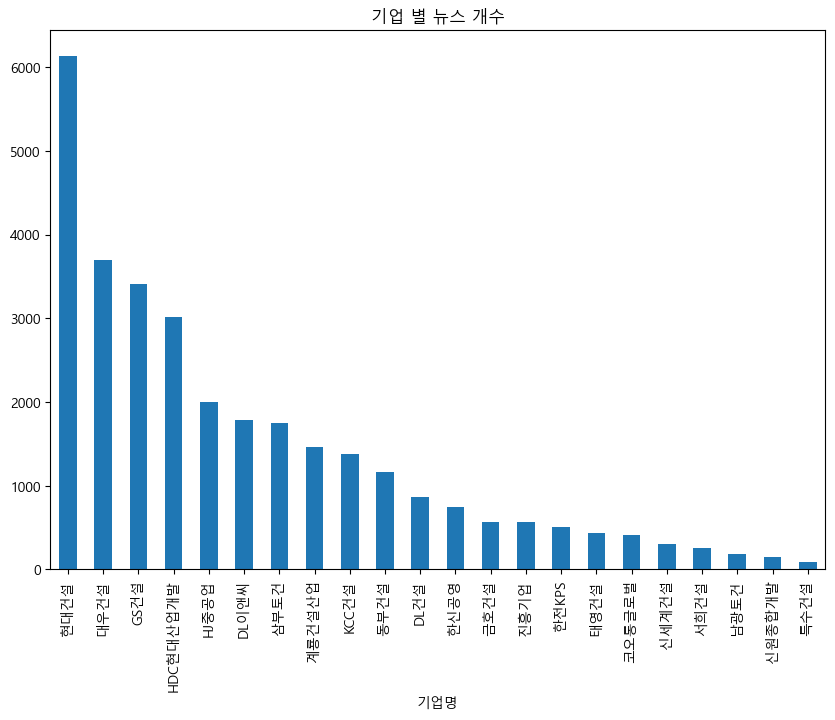

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.figure(figsize=(10, 7))

news.value_counts('기업명').plot.bar(0)

plt.title('기업 별 뉴스 개수')
plt.show()

### 매체별 뉴스 기사 수

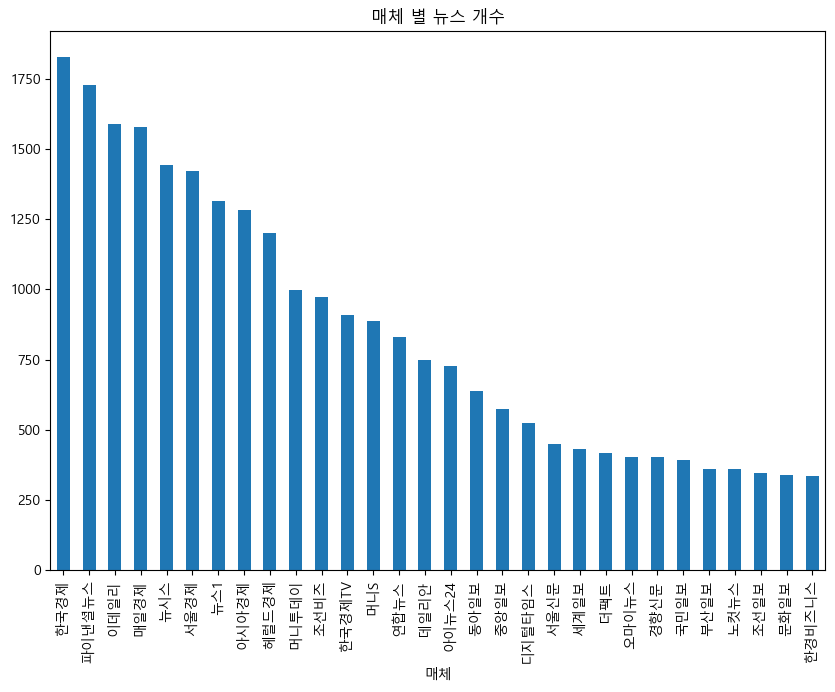

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.figure(figsize=(10, 7))
news.value_counts('매체')[:30].plot.bar()
plt.title('매체 별 뉴스 개수')
plt.show()

### 기업별 뉴스 개수 추이 (2020년 1년 -2023년 9월)

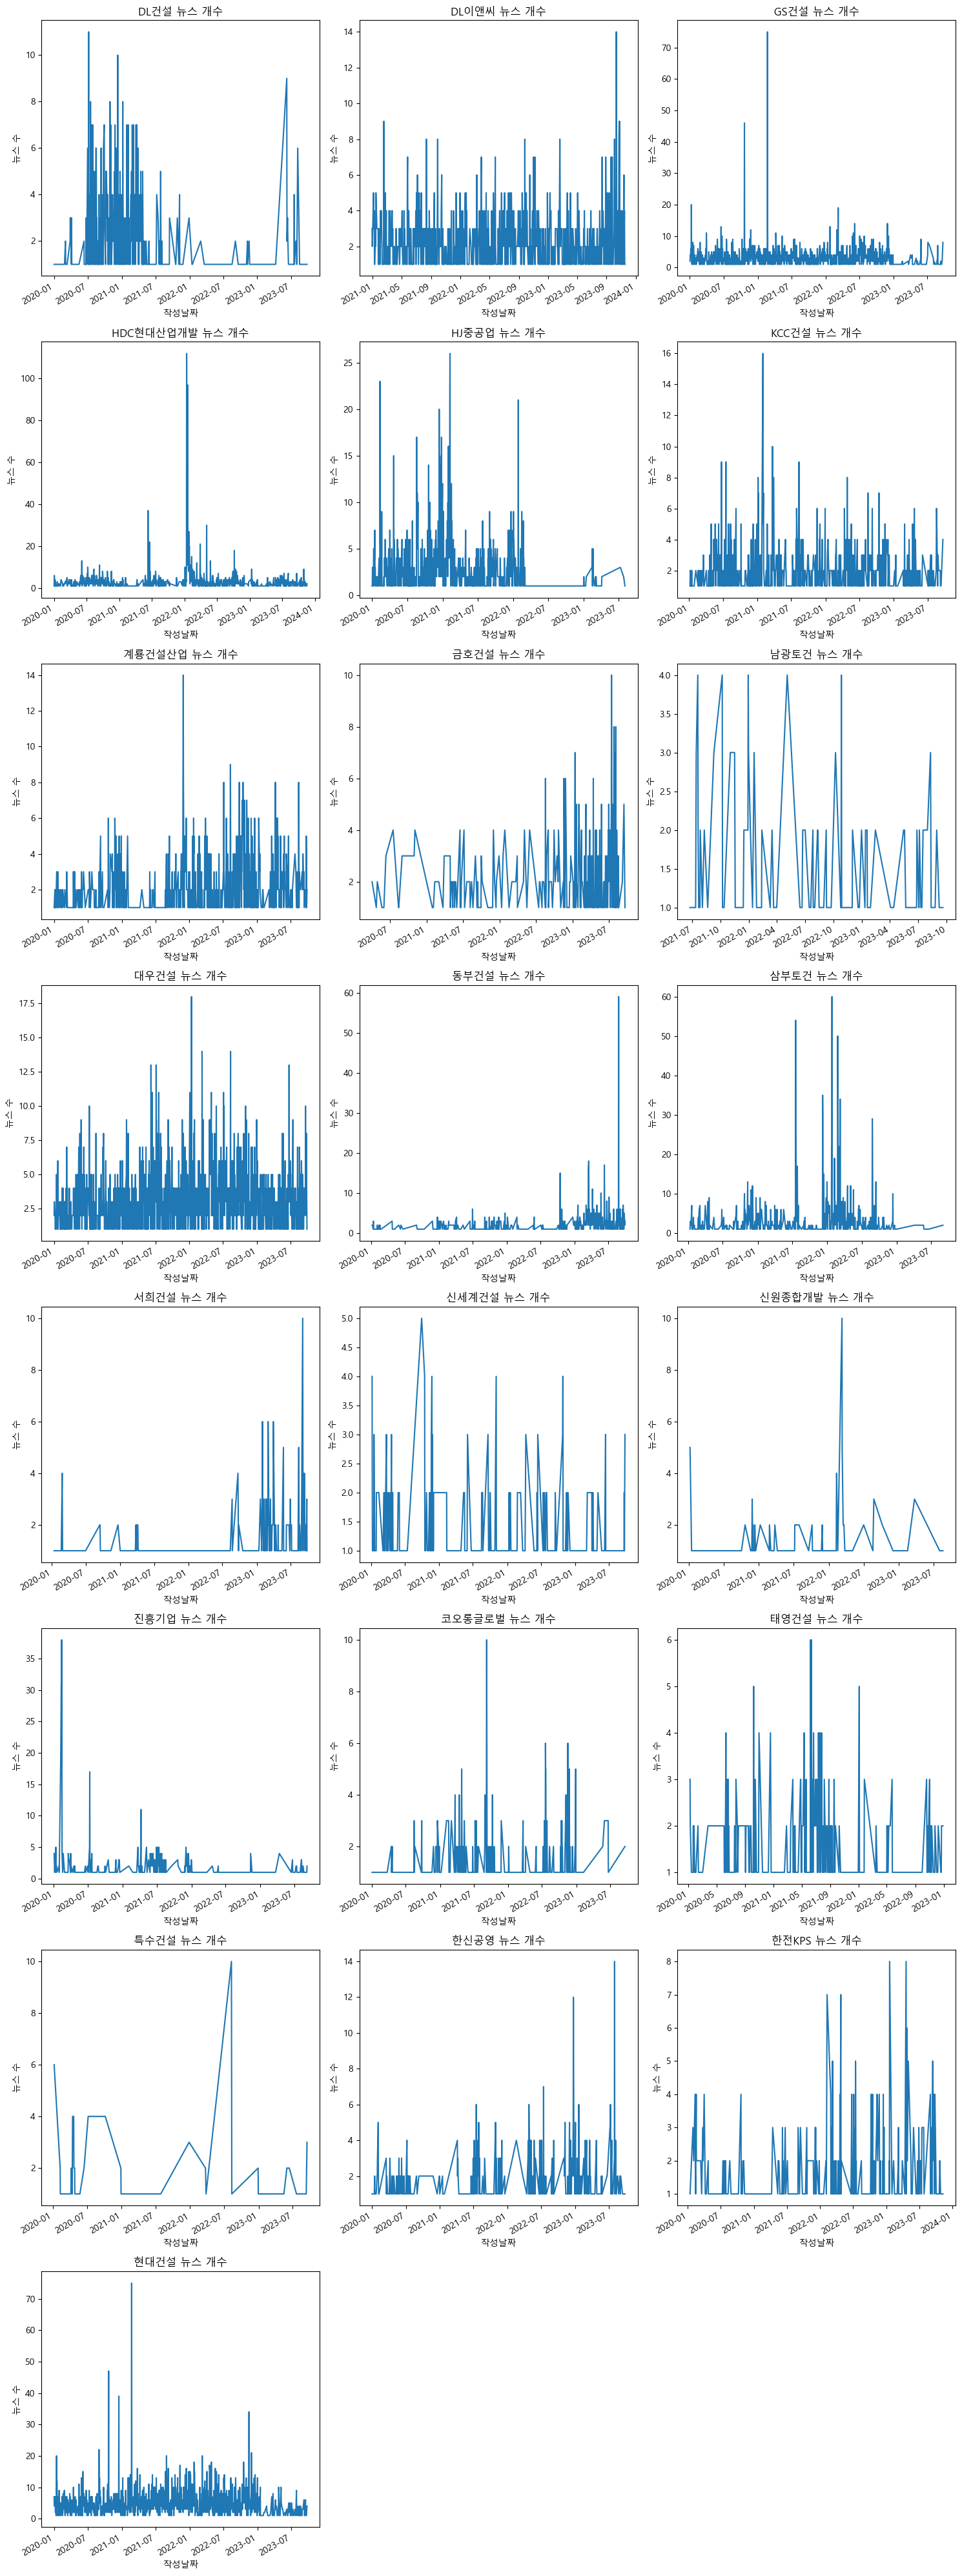

In [6]:
import matplotlib.pyplot as plt

news['작성날짜'] = pd.to_datetime(news['작성날짜'])

# 모든 회사 리스트 가져오기
companies = news['기업명'].unique()

# 열의 최대 개수 설정
max_columns = 3

# 행과 열의 개수 계산
num_rows = len(companies) // max_columns + (len(companies) % max_columns > 0)
num_columns = min(len(companies), max_columns)

# 그래프 생성
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# 회사 리스트를 순회하면서 각각의 그래프 생성
for i, company in enumerate(companies):
    # 현재 회사에 해당하는 데이터 필터링
    company_data = news[news['기업명'] == company]

    # 그래프를 현재 위치에 표시
    row_index = i // max_columns
    col_index = i % max_columns
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

    # '작성날짜'에 따른 뉴스 빈도 플로팅
    company_data.value_counts('작성날짜').sort_index().plot(ax=ax, title=f'{company} 뉴스 개수')
    ax.set_xlabel('작성날짜')
    ax.set_ylabel('뉴스 수')

# 마지막 열의 빈 서브플롯 숨기기
for j in range(len(companies), num_rows * num_columns):
    axes.flatten()[j].axis('off')

# 그래프간 간격 조절
plt.tight_layout()

# 그래프 표시
plt.show()


## 문장 데이터

### 데이터 불러오기

In [7]:
import pandas as pd

sentences = pd.read_csv('sentences_DB_중복제거.csv', encoding='utf-8-sig')
sentences.head()

,ID,기업명,종목명,종목코드,작성날짜,날짜,연분기,매체,제목,url,문장,구분
0,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,아이뉴스24,"82돌 대림, 새 사명 'DL'과 CI 공개…""글로벌 디벨로퍼 도약""",https://n.news.naver.com/mnews/article/031/000...,내년 창사 82주년을 맞이하는 대림이 지주사 체제 전환을 앞두고 새 사명과 그룹 C...,G
1,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,아이뉴스24,"82돌 대림, 새 사명 'DL'과 CI 공개…""글로벌 디벨로퍼 도약""",https://n.news.naver.com/mnews/article/031/000...,기업가치 재평가를 통해서 주주가치 제고와 주주이익 극대화를 실현할 수 있을 것으로 ...,G
2,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,아이뉴스24,"82돌 대림, 새 사명 'DL'과 CI 공개…""글로벌 디벨로퍼 도약""",https://n.news.naver.com/mnews/article/031/000...,새로운 CI와 함께 사명도 변경됐다.,G
3,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,아이뉴스24,"82돌 대림, 새 사명 'DL'과 CI 공개…""글로벌 디벨로퍼 도약""",https://n.news.naver.com/mnews/article/031/000...,지주회사 사명은 DL㈜다.,G
4,C001880202004,DL건설,DL건설,1880,2020-12-29,2020-10-01,202004,아이뉴스24,"82돌 대림, 새 사명 'DL'과 CI 공개…""글로벌 디벨로퍼 도약""",https://n.news.naver.com/mnews/article/031/000...,"계열사인 대림에너지, 대림에프엔씨, 대림자동차도 각각 DL에너지(DL Energy)...",G


In [8]:
sentences.isnull().sum()

ID      0
기업명     0
종목명     0
종목코드    0
작성날짜    0
날짜      0
연분기     0
매체      0
제목      0
url     0
문장      0
구분      0
dtype: int64

### 기업별 최종 뉴스 개수

In [9]:
sentences.drop_duplicates('제목').value_counts('기업명')

기업명
현대건설         2106
HDC현대산업개발    1823
GS건설         1608
대우건설         1400
HJ중공업        1144
DL건설          801
삼부토건          536
계룡건설산업        391
동부건설          361
한전KPS         346
코오롱글로벌        215
금호건설          180
한신공영          156
태영건설          151
DL이앤씨         137
서희건설          100
신세계건설          98
진흥기업           84
신원종합개발         43
남광토건           32
KCC건설          32
특수건설           31
dtype: int64

### 기업별 aspect에 따른 뉴스 문장 수

In [10]:
pv = pd.pivot_table(sentences, values='문장', index =['기업명'], columns=['구분'], aggfunc='count', fill_value = 0, margins=True)
pv = pv[['E', 'S', 'G', 'All']]
pv

구분,E,S,G,All
기업명,,,,
DL건설,1099,2431,1044,4574
DL이앤씨,1234,2593,1229,5056
GS건설,2187,3154,2857,8198
HDC현대산업개발,364,6687,3430,10481
HJ중공업,524,4078,1259,5861
KCC건설,8,23,70,101
계룡건설산업,245,1088,446,1779
금호건설,114,413,136,663
남광토건,16,127,42,185


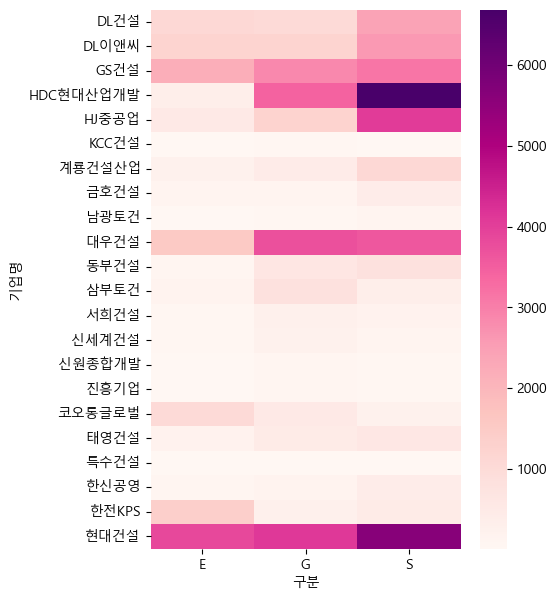

In [11]:
import seaborn as sns
plt.figure(figsize=(5, 7))
sen = pd.pivot_table(sentences, values='문장', index =['기업명'], columns=['구분'], aggfunc='count', fill_value = 0)
sns.heatmap(sen, cmap='RdPu')
plt.show()

### 문장 워드클라우드

In [12]:
import re

# MeCab으로 형태소 분석 & 품사 태그
from konlpy.tag import Mecab
mecab = Mecab(dicpath="C:\mecab\mecab-ko-dic")

# 형태소와 품사를 추출하는 함수
def morphs_and_pos(text):
    result = mecab.pos(text)
    return result

# 필요한 단어만 추출하는 함수
def extract_category(ls):
    Pos = ['NNP', 'NNG'] # 고유명사, 일반명사
    stopWord = ['산업', '특성','개별', '사진', '그룹', '아이', '뉴스', '서온', '기자', '내년', '동시', '분야', '공식', '블록', '세상', '형상', '무단', '가운데', '대표', '이사',
                '지하', '지상', '무단', '전재', '배포', '금지', '일반', '경우', '기업', '당시', '지난해', '전년', '대비','자체', '최근', '한국', '전용', '면적', '데일리', '스타', '네이버', '채널', '구독', '재밌', 'TV', '영상', '바로', '수록',
                '조간', '브리핑', '신문', '이번', '오늘', '인사이트', '이달', '부문', '지구', '연내', '계속', '클럽'] # 불용어
    lst = []

    for wrd in ls:
        if len(wrd[0]) > 1:
            if wrd[1] in Pos: # 명사만 추출
                if wrd[0] not in stopWord: # 불용어 제거
                    lst.append(wrd[0])
    return lst

# 토큰 열 만들기
import ast
def make_tokens(row):
    result_tokens = []  # 빈 리스트 초기화
    tokens = ' '.join(extract_category(row))
    result_tokens.append(tokens)  # 각 토큰 리스트를 결과 리스트에 추가
    return result_tokens  # 각 토큰 리스트를 반환


sentences['품사'] = sentences['문장'].apply(morphs_and_pos)
sentences['토큰'] = sentences['품사'].apply(make_tokens)


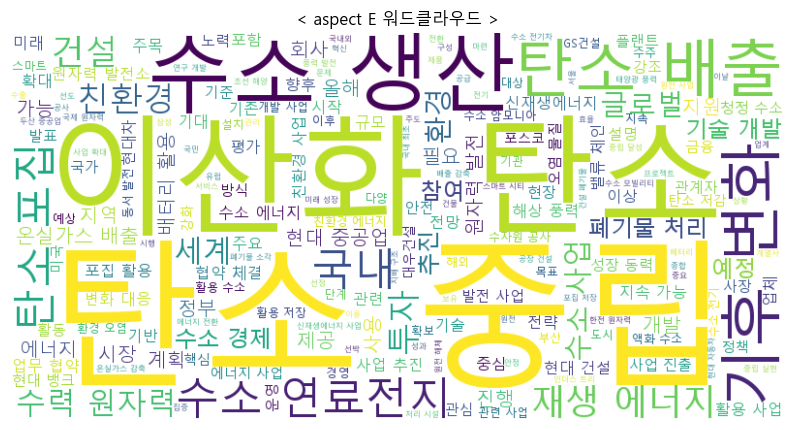

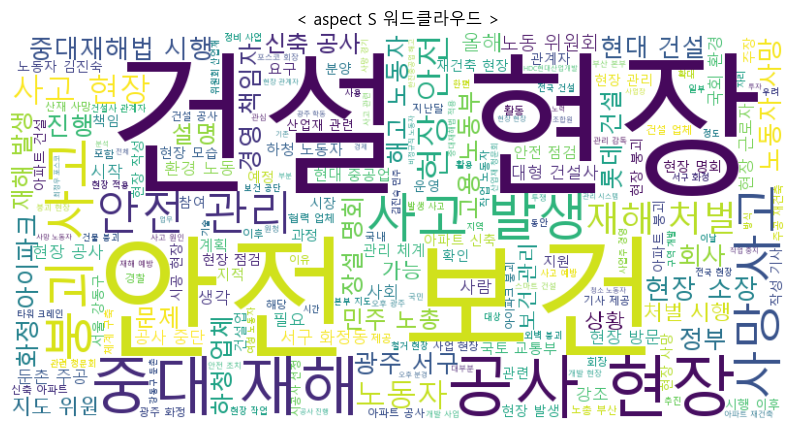

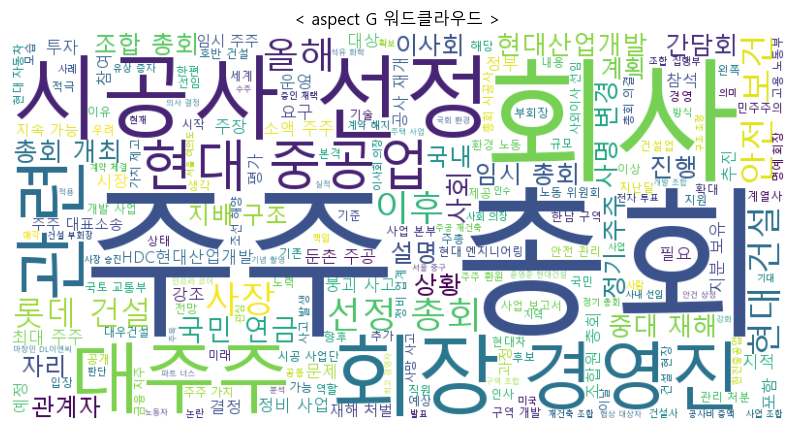

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

categories = ['E', 'S', 'G']

# 반복문을 사용하여 각 카테고리에 대한 워드클라우드 생성
for category in categories:
    df = sentences[sentences['구분'] == category]

    all_nouns_list = [noun for nouns_list in df['토큰'] for noun in nouns_list]
    all_nouns_str = ' '.join(all_nouns_list)

    stopwords = []

    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, stopwords=stopwords).generate(all_nouns_str)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'< aspect {category} 워드클라우드 >')
    plt.show()
